In [1]:
import darwinian_shift
import pandas as pd
from darwinian_shift import DarwinianShift
import seaborn as sns
import matplotlib.pyplot as plt
from darwinian_shift import BinomTest
from darwinian_shift import MonteCarloTest
from darwinian_shift import CDFMonteCarloTest
import numpy as np

import matplotlib

/Users/davidshorthouse/anaconda3/envs/dsenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/davidshorthouse/anaconda3/envs/dsenv/lib/python3.8/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
def plot_boxplot2(self, spectra=None, plot_scale=None, show_plot=False, colours=None,
                     figsize=(5, 5), return_fig=False, ax=None):
        """
        Boxplot of the expected and observed distributions of mutation scores.
        :param spectra: The mutational spectrum or list of mutational spectra to use.
        :param plot_scale:  Scale for the y-axis (mutation scores). Passed to matplotlib. 'log', 'symlog' etc.
        :param show_plot: If True, will call plt.show().
        :param colours: List of colours. First colour is for the observed data, the subsequent colours are
        for plotting the null distributions from each of the mutational spectra given.
        :param figsize: Size of the figure.
        :param return_fig: If True, will return the figure. Used for testing.
        :param ax: Matplotlib axis to plot on. If None, will create a new figure.
        :return: By default, None. If return_fig=True, will return the figure.
        """
#        if ax is None:
#            fig, ax = plt.subplots(figsize=figsize)
#        else:
#            fig = ax.figure

        spectra = self._get_spectra(spectra)

        colours = self._get_plot_colours(colours, len(spectra)+1)
        data = [get_distribution_from_mutational_spectrum(self.null_scores,
                                                          self.null_mutations[spectrum.rate_column])
                for spectrum in spectra]
        data.append(self.observed_values)
        
        return(data)
    
def get_distribution_from_mutational_spectrum(values, mut_rates, num=1000000):
    mut_rates = np.array(mut_rates)
    weights = mut_rates / mut_rates.sum()
    dist = np.repeat(values, np.random.multinomial(num, weights))
    return dist

In [3]:
CROSS_mutation_data = pd.read_csv("../CROSS_mutations.csv")
FLOT_mutation_data = pd.read_csv("../FLOT_mutations.csv")
NT_mutation_data = pd.read_csv("../NT_mutations.csv")

In [4]:
d_cross = DarwinianShift(
    data = CROSS_mutation_data,
    source_genome = "GRCh37",
    included_mutation_types = "missense")

d_flot = DarwinianShift(
    data = FLOT_mutation_data,
    source_genome = "GRCh37",
    included_mutation_types = "missense")

d_nt = DarwinianShift(
    data = NT_mutation_data,
    source_genome = "GRCh37",
    included_mutation_types = "missense")

## Binding DDG

In [5]:
from darwinian_shift import FoldXLookup

fold = FoldXLookup(foldx_results_directory = "../Foldx_binding/",
                  sifts_directory = ".",
                  download_sifts=True)

In [6]:
RAC1 = {
    "gene": "RAC1",
    "pdb_id": "3TH5",
    "pdb_chain": "A",
}

### CROSS

In [7]:
s_cross = d_cross.run_section(RAC1, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [8]:
s_cross.get_results_dictionary()

{'gene': 'RAC1',
 'transcript_id': 'ENST00000356142',
 'chrom': '7',
 'section_id': '3TH5:A',
 'num_mutations': 3,
 'observed_median': 0.11686,
 'observed_mean': 0.4048366666666667,
 'expected_median_glob_k3': -0.0,
 'median_shift_glob_k3': 0.11686,
 'expected_mean_glob_k3': 0.3382436466085544,
 'mean_shift_glob_k3': 0.0665930200581123,
 'MC_Mean_glob_k3_observed': 0.4048366666666667,
 'MC_Mean_glob_k3_null_mean': 0.3252884704333333,
 'MC_Mean_glob_k3_null_median': 0.13975983333333333,
 'MC_Mean_glob_k3_pvalue': 0.5691430856914309,
 'MC_Mean_glob_k3_num_smaller_or_equal': 7156,
 'MC_Mean_glob_k3_num_larger_or_equal': 2846,
 'MC_Median_glob_k3_observed': 0.11686,
 'MC_Median_glob_k3_null_mean': 0.15557659790000003,
 'MC_Median_glob_k3_null_median': 0.0,
 'MC_Median_glob_k3_pvalue': 0.5473452654734526,
 'MC_Median_glob_k3_num_smaller_or_equal': 7376,
 'MC_Median_glob_k3_num_larger_or_equal': 2737,
 'CDF_MC_glob_k3_num_smaller_or_equal': 9016,
 'CDF_MC_glob_k3_num_larger_or_equal': 986,
 

### FLOT

In [9]:
s_flot = d_flot.run_section(RAC1, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [10]:
s_flot.get_results_dictionary()

{'gene': 'RAC1',
 'transcript_id': 'ENST00000356142',
 'chrom': '7',
 'section_id': '3TH5:A',
 'num_mutations': 7,
 'observed_median': -0.01179,
 'observed_mean': -1.144477142857143,
 'expected_median_glob_k3': 0.01587,
 'median_shift_glob_k3': -0.027659999999999997,
 'expected_mean_glob_k3': 0.3841510986118696,
 'mean_shift_glob_k3': -1.5286282414690127,
 'MC_Mean_glob_k3_observed': -1.144477142857143,
 'MC_Mean_glob_k3_null_mean': 0.38236220211428573,
 'MC_Mean_glob_k3_null_median': 0.23450028571428572,
 'MC_Mean_glob_k3_pvalue': 0.0021997800219978004,
 'MC_Mean_glob_k3_num_smaller_or_equal': 11,
 'MC_Mean_glob_k3_num_larger_or_equal': 9991,
 'MC_Median_glob_k3_observed': -0.01179,
 'MC_Median_glob_k3_null_mean': 0.10630738120000001,
 'MC_Median_glob_k3_null_median': 0.01587,
 'MC_Median_glob_k3_pvalue': 0.25377462253774624,
 'MC_Median_glob_k3_num_smaller_or_equal': 1269,
 'MC_Median_glob_k3_num_larger_or_equal': 8635,
 'CDF_MC_glob_k3_num_smaller_or_equal': 1088,
 'CDF_MC_glob_k3_n

### NT

In [11]:
s_nt = d_nt.run_section(RAC1, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [12]:
s_nt.get_results_dictionary()

{'gene': 'RAC1',
 'transcript_id': 'ENST00000356142',
 'chrom': '7',
 'section_id': '3TH5:A',
 'num_mutations': 2,
 'observed_median': -0.32849900000000004,
 'observed_mean': -0.32849900000000004,
 'expected_median_glob_k3': 9e-05,
 'median_shift_glob_k3': -0.328589,
 'expected_mean_glob_k3': 0.3554664415102783,
 'mean_shift_glob_k3': -0.6839654415102783,
 'MC_Mean_glob_k3_observed': -0.32849900000000004,
 'MC_Mean_glob_k3_null_mean': 0.35000336070000004,
 'MC_Mean_glob_k3_null_median': 0.11528250000000001,
 'MC_Mean_glob_k3_pvalue': 0.29657034296570345,
 'MC_Mean_glob_k3_num_smaller_or_equal': 1483,
 'MC_Mean_glob_k3_num_larger_or_equal': 8519,
 'MC_Median_glob_k3_observed': -0.32849900000000004,
 'MC_Median_glob_k3_null_mean': 0.33481684510000004,
 'MC_Median_glob_k3_null_median': 0.0788275,
 'MC_Median_glob_k3_pvalue': 0.30956904309569044,
 'MC_Median_glob_k3_num_smaller_or_equal': 1548,
 'MC_Median_glob_k3_num_larger_or_equal': 8454,
 'CDF_MC_glob_k3_num_smaller_or_equal': 2781,
 '

### Plotting

In [13]:
data_cross = plot_boxplot2(s_cross)
data_flot = plot_boxplot2(s_flot)
data_nt= plot_boxplot2(s_nt)

basedistcross = data_cross[0]
crossdist = data_cross[1]
basedistflot = data_flot[0]
flotdist = data_flot[1]
basedistnt = data_flot[0]
ntdist = data_nt[1]

basedistcross = pd.DataFrame(basedistcross)
basedistcross["label"] = "base_cross"
basedistcross.columns = ["score", "label"]

basedistflot = pd.DataFrame(basedistflot)
basedistflot["label"] = "base_flot"
basedistflot.columns = ["score", "label"]

basedistnt = pd.DataFrame(basedistnt)
basedistnt["label"] = "base_nt"
basedistnt.columns = ["score", "label"]

crossdist = pd.DataFrame(crossdist)
crossdist["label"] = "cross"

flotdist = pd.DataFrame(flotdist)
flotdist["label"] = "flot"

ntdist = pd.DataFrame(ntdist)
ntdist["label"] = "nt"

testdist_cross = pd.DataFrame([-15])
testdist_cross["label"] = "base_cross"
testdist_cross.columns = ["score", "label"]

testdist_flot = pd.DataFrame([-15])
testdist_flot["label"] = "base_flot"
testdist_flot.columns = ["score", "label"]

testdist_nt = pd.DataFrame([-15])
testdist_nt["label"] = "base_nt"
testdist_nt.columns = ["score", "label"]

combined = pd.concat([basedistcross, crossdist, basedistflot, flotdist,basedistnt, ntdist], axis =0)
combined2 = pd.concat([testdist_cross, crossdist,testdist_flot, flotdist,testdist_nt, ntdist], axis =0)

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_99069/767672289.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 14)


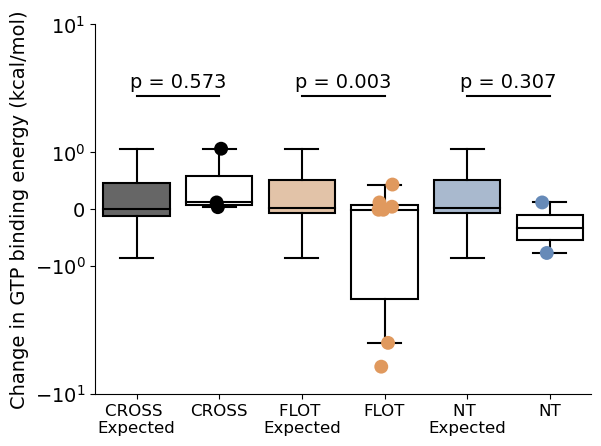

In [14]:
fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


g = sns.boxplot(data = combined, x = "label", y = "score"
                , palette = ["k", "w", "#E0995E", "w", "#668AB8", "w"], showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))

g2 = sns.stripplot(data = combined2, x = "label", y = "score", palette=["w", "k","w", "#E0995E","w", "#668AB8"], size = 10)

x1, x2 = 0, 1  
y, h, col = 2, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.573", ha='center', va='bottom', color=col, size = 14)


x1, x2 = 2, 3  
y, h, col = 2, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.003", ha='center', va='bottom', color=col, size = 14)

x1, x2 = 4, 5  
y, h, col = 2, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.307", ha='center', va='bottom', color=col, size = 14)

g.set_xlabel("")
g.set_xticklabels(["CROSS \nExpected", "CROSS", "FLOT \nExpected", "FLOT", "NT \nExpected", "NT"], size = 12)

g.set_ylabel("Change in GTP binding energy (kcal/mol)", size = 14)
g.set_yticklabels(g.get_yticklabels(), size = 14)
ax.set_yscale("symlog")
ax.set_ylim(-10, 10)
sns.despine()

plt.savefig("RAC1_GTPbindingenergy.pdf", bbox_inches = "tight")

## Distance to GTP

In [15]:
from darwinian_shift import StructureDistanceLookup

atpdist = StructureDistanceLookup(target_key = "target_selection", distance_to_alpha_carbons=True,
                                 sifts_directory = ".", pdb_directory=".")

In [16]:
RAC1_dist = {
    "gene": "RAC1",
    "pdb_id": "3TH5",
    "pdb_chain": "A",
    "target_selection":"chainID A and resname GNP"}

### CROSS

In [17]:
s_dist_cross = d_cross.run_section(RAC1_dist, lookup=atpdist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [18]:
s_dist_cross.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.10218978102189781,
 'MC_Median_glob_k3_pvalue': 0.2927707229277072,
 'CDF_MC_glob_k3_pvalue': 0.1321867813218678}

### FLOT

In [19]:
s_dist_flot = d_flot.run_section(RAC1_dist, lookup=atpdist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [20]:
s_dist_flot.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.1331866813318668,
 'MC_Median_glob_k3_pvalue': 0.024397560243975602,
 'CDF_MC_glob_k3_pvalue': 0.10878912108789121}

### NT

In [21]:
s_dist_nt = d_nt.run_section(RAC1_dist, lookup=atpdist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [22]:
s_dist_nt.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.049795020497950204,
 'MC_Median_glob_k3_pvalue': 0.23677632236776322,
 'CDF_MC_glob_k3_pvalue': 0.07999200079992001}

### Plotting

In [23]:
data_cross = plot_boxplot2(s_dist_cross)
data_flot = plot_boxplot2(s_dist_flot)
data_nt= plot_boxplot2(s_dist_nt)

basedistcross = data_cross[0]
crossdist = data_cross[1]
basedistflot = data_flot[0]
flotdist = data_flot[1]
basedistnt = data_flot[0]
ntdist = data_nt[1]

basedistcross = pd.DataFrame(basedistcross)
basedistcross["label"] = "base_cross"
basedistcross.columns = ["score", "label"]

basedistflot = pd.DataFrame(basedistflot)
basedistflot["label"] = "base_flot"
basedistflot.columns = ["score", "label"]

basedistnt = pd.DataFrame(basedistnt)
basedistnt["label"] = "base_nt"
basedistnt.columns = ["score", "label"]

crossdist = pd.DataFrame(crossdist)
crossdist["label"] = "cross"

flotdist = pd.DataFrame(flotdist)
flotdist["label"] = "flot"

ntdist = pd.DataFrame(ntdist)
ntdist["label"] = "nt"

testdist_cross = pd.DataFrame([-15])
testdist_cross["label"] = "base_cross"
testdist_cross.columns = ["score", "label"]

testdist_flot = pd.DataFrame([-15])
testdist_flot["label"] = "base_flot"
testdist_flot.columns = ["score", "label"]

testdist_nt = pd.DataFrame([-15])
testdist_nt["label"] = "base_nt"
testdist_nt.columns = ["score", "label"]

combined = pd.concat([basedistcross, crossdist, basedistflot, flotdist,basedistnt, ntdist], axis =0)
combined2 = pd.concat([testdist_cross, crossdist,testdist_flot, flotdist,testdist_nt, ntdist], axis =0)

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_99069/470348554.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 14)
/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_99069/470348554.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels([0,5,10,15,20,25,30], size = 14)


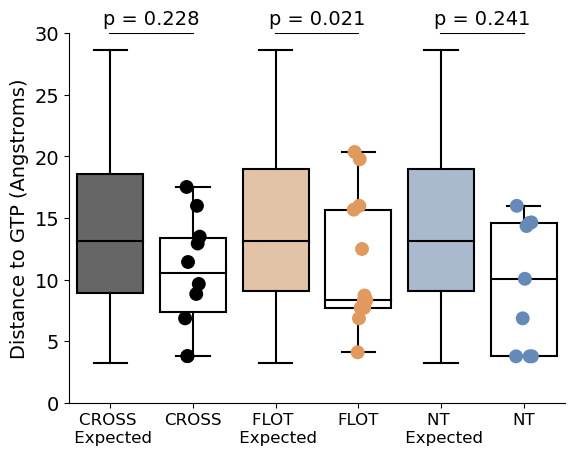

In [24]:
fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


g = sns.boxplot(data = combined, x = "label", y = "score"
                , palette = ["k", "w", "#E0995E", "w", "#668AB8", "w"], showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))

g2 = sns.stripplot(data = combined2, x = "label", y = "score", palette=["w", "k","w", "#E0995E","w", "#668AB8"], size = 10)

x1, x2 = 0, 1  
y, h, col = 30, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.228", ha='center', va='bottom', color=col, size = 14)


x1, x2 = 2, 3  
y, h, col = 30, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.021", ha='center', va='bottom', color=col, size = 14)

x1, x2 = 4, 5  
y, h, col = 30, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.241", ha='center', va='bottom', color=col, size = 14)

g.set_xlabel("")
g.set_xticklabels(["CROSS \n Expected", "CROSS", "FLOT \n Expected", "FLOT", "NT \n Expected", "NT"], size = 12)

g.set_ylabel("Distance to GTP (Angstroms)", size = 14)
g.set_yticklabels(g.get_yticklabels(), size = 14)
ax.set_ylim(0, 30)
sns.despine()

g.set_yticklabels([0,5,10,15,20,25,30], size = 14)

plt.savefig("RAC1_distancetoGTP.pdf")
plt.show()

## Switch distance

In [25]:
## Switch 1 residues
RAC1_switch1 = {
    "gene": "RAC1",
    "pdb_id": "3TH5",
    "pdb_chain": "A",
    "target_selection":"chainID A and resid 32 to 38"}

In [26]:
from darwinian_shift import StructureDistanceLookup

switchdist = StructureDistanceLookup(target_key = "target_selection", distance_to_alpha_carbons=True,
                                 sifts_directory = ".", pdb_directory=".")

In [27]:
s_dist_cross = d_cross.run_section(RAC1_switch1, lookup=switchdist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

s_dist_flot = d_flot.run_section(RAC1_switch1, lookup=switchdist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

s_dist_nt = d_nt.run_section(RAC1_switch1, lookup=switchdist, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [28]:
s_dist_cross.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.3467653234676532,
 'MC_Median_glob_k3_pvalue': 0.10278972102789721,
 'CDF_MC_glob_k3_pvalue': 0.26017398260173985}

In [29]:
s_dist_flot.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.12358764123587641,
 'MC_Median_glob_k3_pvalue': 0.025997400259974,
 'CDF_MC_glob_k3_pvalue': 0.097990200979902}

In [30]:
s_dist_nt.get_pvalues()

{'MC_Mean_glob_k3_pvalue': 0.006799320067993201,
 'MC_Median_glob_k3_pvalue': 0.009599040095990401,
 'CDF_MC_glob_k3_pvalue': 0.027997200279972004}

## Plotting

In [31]:
data_cross = plot_boxplot2(s_dist_cross)
data_flot = plot_boxplot2(s_dist_flot)
data_nt= plot_boxplot2(s_dist_nt)

basedistcross = data_cross[0]
crossdist = data_cross[1]
basedistflot = data_flot[0]
flotdist = data_flot[1]
basedistnt = data_flot[0]
ntdist = data_nt[1]

basedistcross = pd.DataFrame(basedistcross)
basedistcross["label"] = "base_cross"
basedistcross.columns = ["score", "label"]

basedistflot = pd.DataFrame(basedistflot)
basedistflot["label"] = "base_flot"
basedistflot.columns = ["score", "label"]

basedistnt = pd.DataFrame(basedistnt)
basedistnt["label"] = "base_nt"
basedistnt.columns = ["score", "label"]

crossdist = pd.DataFrame(crossdist)
crossdist["label"] = "cross"

flotdist = pd.DataFrame(flotdist)
flotdist["label"] = "flot"

ntdist = pd.DataFrame(ntdist)
ntdist["label"] = "nt"

testdist_cross = pd.DataFrame([-15])
testdist_cross["label"] = "base_cross"
testdist_cross.columns = ["score", "label"]

testdist_flot = pd.DataFrame([-15])
testdist_flot["label"] = "base_flot"
testdist_flot.columns = ["score", "label"]

testdist_nt = pd.DataFrame([-15])
testdist_nt["label"] = "base_nt"
testdist_nt.columns = ["score", "label"]

combined = pd.concat([basedistcross, crossdist, basedistflot, flotdist,basedistnt, ntdist], axis =0)
combined2 = pd.concat([testdist_cross, crossdist,testdist_flot, flotdist,testdist_nt, ntdist], axis =0)

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_99069/3342205516.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels([0,5,10,15,20,25,30,35,40], size = 14)


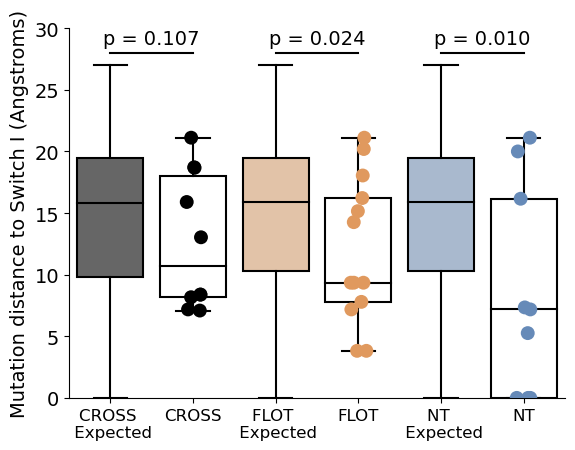

In [32]:
fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

g = sns.boxplot(data = combined, x = "label", y = "score"
                , palette = ["k", "w", "#E0995E", "w", "#668AB8", "w"], showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))

g2 = sns.stripplot(data = combined2, x = "label", y = "score", palette=["w", "k","w", "#E0995E", "w","#668AB8"], size = 10)

x1, x2 = 0, 1  
y, h, col = 28, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.107", ha='center', va='bottom', color=col, size = 14)


x1, x2 = 2, 3  
y, h, col = 28, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.024", ha='center', va='bottom', color=col, size = 14)

x1, x2 = 4, 5  
y, h, col = 28, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.4, "p = 0.010", ha='center', va='bottom', color=col, size = 14)

g.set_xlabel("")
g.set_xticklabels(["CROSS \n Expected", "CROSS", "FLOT \n Expected", "FLOT", "NT \n Expected", "NT"], size = 12)

g.set_ylabel("Mutation distance to Switch I (Angstroms)", size = 14)
g.set_yticklabels([0,5,10,15,20,25,30,35,40], size = 14)
#ax.set_yscale("symlog")
ax.set_ylim(0, 30)
sns.despine()

plt.savefig("RAC1_switchI_distance.pdf", bbox_inches = "tight")

## Foldx DDG

In [33]:
from darwinian_shift import FoldXLookup

fold = FoldXLookup(foldx_results_directory = "../Foldx/",
                  sifts_directory = ".",
                  download_sifts=True)

RAC1 = {
    "gene": "RAC1",
    "pdb_id": "3TH5",
    "pdb_chain": "A",
}

## CROSS

In [34]:
s_cross = d_cross.run_section(RAC1, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [35]:
s_cross.get_results_dictionary()

{'gene': 'RAC1',
 'transcript_id': 'ENST00000356142',
 'chrom': '7',
 'section_id': '3TH5:A',
 'num_mutations': 7,
 'observed_median': 1.67831,
 'observed_mean': 6.102322071428572,
 'expected_median_glob_k3': 1.04968,
 'median_shift_glob_k3': 0.62863,
 'expected_mean_glob_k3': 2.2123782504103024,
 'mean_shift_glob_k3': 3.88994382101827,
 'MC_Mean_glob_k3_observed': 6.102322071428572,
 'MC_Mean_glob_k3_null_mean': 2.198628487483857,
 'MC_Mean_glob_k3_null_median': 1.7100810785714287,
 'MC_Mean_glob_k3_pvalue': 0.06259374062593741,
 'MC_Mean_glob_k3_num_smaller_or_equal': 9689,
 'MC_Mean_glob_k3_num_larger_or_equal': 313,
 'MC_Median_glob_k3_observed': 1.67831,
 'MC_Median_glob_k3_null_mean': 1.1202367028340001,
 'MC_Median_glob_k3_null_median': 1.04968,
 'MC_Median_glob_k3_pvalue': 0.40735926407359263,
 'MC_Median_glob_k3_num_smaller_or_equal': 8006,
 'MC_Median_glob_k3_num_larger_or_equal': 2037,
 'CDF_MC_glob_k3_num_smaller_or_equal': 9209,
 'CDF_MC_glob_k3_num_larger_or_equal': 793,


## FLOT

In [36]:
s_flot = d_flot.run_section(RAC1, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [37]:
s_flot.get_results_dictionary()

{'gene': 'RAC1',
 'transcript_id': 'ENST00000356142',
 'chrom': '7',
 'section_id': '3TH5:A',
 'num_mutations': 8,
 'observed_median': 1.1901000000000002,
 'observed_mean': 2.3014641625,
 'expected_median_glob_k3': 1.0656,
 'median_shift_glob_k3': 0.12450000000000006,
 'expected_mean_glob_k3': 2.3303461972964907,
 'mean_shift_glob_k3': -0.028882034796490874,
 'MC_Mean_glob_k3_observed': 2.3014641625,
 'MC_Mean_glob_k3_null_mean': 2.330317310257625,
 'MC_Mean_glob_k3_null_median': 1.871255125,
 'MC_Mean_glob_k3_pvalue': 0.7993200679932007,
 'MC_Mean_glob_k3_num_smaller_or_equal': 6005,
 'MC_Mean_glob_k3_num_larger_or_equal': 3997,
 'MC_Median_glob_k3_observed': 1.1901000000000002,
 'MC_Median_glob_k3_null_mean': 1.1448618660379999,
 'MC_Median_glob_k3_null_median': 1.04974875,
 'MC_Median_glob_k3_pvalue': 0.8459154084591541,
 'MC_Median_glob_k3_num_smaller_or_equal': 5772,
 'MC_Median_glob_k3_num_larger_or_equal': 4230,
 'CDF_MC_glob_k3_num_smaller_or_equal': 7702,
 'CDF_MC_glob_k3_num_

## NT

In [38]:
s_nt = d_nt.run_section(RAC1, lookup=fold, statistics = [MonteCarloTest(stat_function=np.mean, name = "MC_Mean"),
                                                                     MonteCarloTest(stat_function=np.median, name = "MC_Median"),
                                                                     CDFMonteCarloTest()])

In [39]:
s_nt.get_results_dictionary()

{'gene': 'RAC1',
 'transcript_id': 'ENST00000356142',
 'chrom': '7',
 'section_id': '3TH5:A',
 'num_mutations': 6,
 'observed_median': 1.3061099999999999,
 'observed_mean': 0.899915,
 'expected_median_glob_k3': 1.04968,
 'median_shift_glob_k3': 0.25642999999999994,
 'expected_mean_glob_k3': 2.2792214404184743,
 'mean_shift_glob_k3': -1.3793064404184743,
 'MC_Mean_glob_k3_observed': 0.899915,
 'MC_Mean_glob_k3_null_mean': 2.2848359942235,
 'MC_Mean_glob_k3_null_median': 1.7083209166666664,
 'MC_Mean_glob_k3_pvalue': 0.45655434456554345,
 'MC_Mean_glob_k3_num_smaller_or_equal': 2283,
 'MC_Mean_glob_k3_num_larger_or_equal': 7719,
 'MC_Median_glob_k3_observed': 1.3061099999999999,
 'MC_Median_glob_k3_null_mean': 1.166023897201,
 'MC_Median_glob_k3_null_median': 1.0207035,
 'MC_Median_glob_k3_pvalue': 0.7107289271072893,
 'MC_Median_glob_k3_num_smaller_or_equal': 6449,
 'MC_Median_glob_k3_num_larger_or_equal': 3554,
 'CDF_MC_glob_k3_num_smaller_or_equal': 5227,
 'CDF_MC_glob_k3_num_larger_o

## Plotting

In [40]:
data_cross = plot_boxplot2(s_cross)
data_flot = plot_boxplot2(s_flot)
data_nt= plot_boxplot2(s_nt)

basedistcross = data_cross[0]
crossdist = data_cross[1]
basedistflot = data_flot[0]
flotdist = data_flot[1]
basedistnt = data_flot[0]
ntdist = data_nt[1]

basedistcross = pd.DataFrame(basedistcross)
basedistcross["label"] = "base_cross"
basedistcross.columns = ["score", "label"]

basedistflot = pd.DataFrame(basedistflot)
basedistflot["label"] = "base_flot"
basedistflot.columns = ["score", "label"]

basedistnt = pd.DataFrame(basedistnt)
basedistnt["label"] = "base_nt"
basedistnt.columns = ["score", "label"]

crossdist = pd.DataFrame(crossdist)
crossdist["label"] = "cross"

flotdist = pd.DataFrame(flotdist)
flotdist["label"] = "flot"

ntdist = pd.DataFrame(ntdist)
ntdist["label"] = "nt"

testdist_cross = pd.DataFrame([-15])
testdist_cross["label"] = "base_cross"
testdist_cross.columns = ["score", "label"]

testdist_flot = pd.DataFrame([-15])
testdist_flot["label"] = "base_flot"
testdist_flot.columns = ["score", "label"]

testdist_nt = pd.DataFrame([-15])
testdist_nt["label"] = "base_nt"
testdist_nt.columns = ["score", "label"]

combined = pd.concat([basedistcross, crossdist, basedistflot, flotdist,basedistnt, ntdist], axis =0)
combined2 = pd.concat([testdist_cross, crossdist,testdist_flot, flotdist,testdist_nt, ntdist], axis =0)

/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_99069/1384683117.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 14)
/var/folders/d9/4lyh6rdd5mdbxby_y5lwsy180000gn/T/ipykernel_99069/1384683117.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels([0,-4,-2,0,2,4,6,8,10], size = 14)


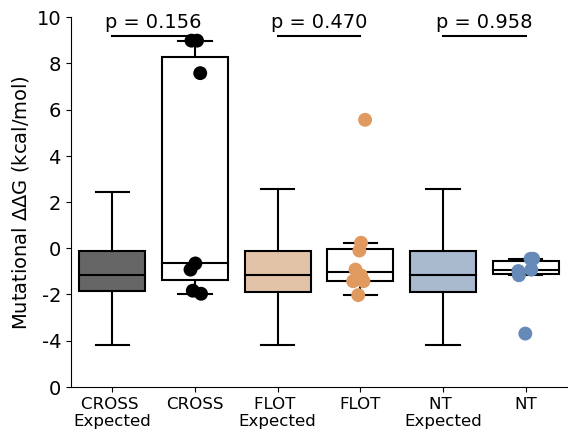

In [41]:
 fig, ax = plt.subplots()

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}


g = sns.boxplot(data = combined, x = "label", y = "score"
                , palette = ["k", "w", "#E0995E", "w", "#668AB8", "w"], showfliers = False)
for patch in ax.patches:
    r, g1, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g1, b, 0.6))

g2 = sns.stripplot(data = combined2, x = "label", y = "score", palette=["w", "k","w", "#E0995E","w", "#668AB8"], size = 10)

x1, x2 = 0, 1  
y, h, col = 14, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.156", ha='center', va='bottom', color=col, size = 14)


x1, x2 = 2, 3  
y, h, col = 14, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.470", ha='center', va='bottom', color=col, size = 14)

x1, x2 = 4, 5  
y, h, col = 14, 0, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h+0.2, "p = 0.958", ha='center', va='bottom', color=col, size = 14)

g.set_xlabel("")
g.set_xticklabels(["CROSS \nExpected", "CROSS", "FLOT \nExpected", "FLOT", "NT \nExpected", "NT"], size = 12)

g.set_ylabel(r"Mutational $\Delta$$\Delta$G (kcal/mol)", size = 14)
g.set_yticklabels(g.get_yticklabels(), size = 14)

#g.set_yscale("symlog")

ax.set_ylim(-5, 15)
sns.despine()


g.set_yticklabels([0,-4,-2,0,2,4,6,8,10], size = 14)

plt.savefig("RAC1_foldxDDG.pdf")
plt.show()